## Seminario :: Analisi statistica spaziale di alcune proprietà dei suoli

### Laurea magistrale in scienze forestali ed ambientali
### corso di Geografia e Valutazione del suolo

Giuliano Langella<br>
glangella@unina.it

#### ––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––

### Step #1: Come si costruisce un variogramma sperimentale

#### ––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––

In [1]:
cd ~/git/seminars/GeogrValutSuolo/

#### Rappresentazione cartografica dei punti di campionamento:

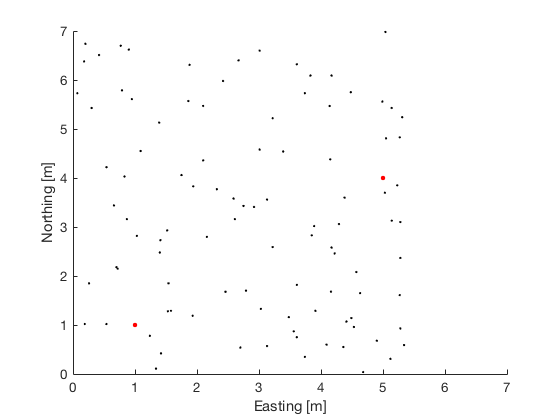

In [2]:
x=[1,5];
y=[1,4];
X=randi(550,100,1)/100;
Y=randi(700,100,1)/100;
Z=randi(2000,100,1)/1000;
figure,hold on
scatter(X,Y,01,'.','k'),axis([0,7,0,7])
scatter(x,y,95,'.','r'),axis([0,7,0,7])
xlabel('Easting [m]'),ylabel('Northing [m]')
hold off

Note sul campionamento:
<ul>
  <li> Area/Scala di indagine; </li>
  <li> Localizzazione e densità dei punti di campionamento; </li>
  <li> Tipologie di campionamento (profili, pit, trivellate, osservazioni, ...); </li>
  <li> Scopo del campionamento: osservare l'ubicazione ed i tipi di suoli nell'area di indagine; </li>
  <li> Raccolta di campioni di suolo, per ciascun orizzonte, per le analisi fisico-chimiche; </li>
  <li> C'è un lavoro preliminare per ottenere dati sui suoli utili alle indagini (geo-)statistiche;</li>
</ul>

#### Trascuriamo le nozioni cartografiche:
<ul>
  <li> Meridiani (Greenwich) e Paralleli (Equatore); </li>
  <li> Geoide vs Ellissoide (WGS84); </li>
  <li> Sistema di coordinate (Geocentrico, Geografico, Piano); </li>
  <li> Trasformazioni tra sistemi; </li>
  <li> Datum (WGS84, Roma40, ...):
  <ul>
    <li> scegliere l’ellissoide, </li>
    <li> eseguirne una materializzazione, </li>
    <li> orientarlo in un punto (verticale corrispondente alla normale), </li>
  </ul>
  <li> <font color="red">Le analisi statistiche spaziali richiedono sistemi di riferimento piani (proiezioni)!</font> </li>
</ul>

#### Sistemi di riferimento:
<ul>
  <li> <a href="http://spatialreference.org/ref/epsg/wgs-84/">geografico, Globale [EPSG:4326]</a> </li>
  <li> <a href="http://spatialreference.org/ref/epsg/wgs-84-utm-zone-32n/">piano, Italia Fuso Ovest [EPSG:32632]</a> </li>
  <li> <a href="http://spatialreference.org/ref/epsg/wgs-84-utm-zone-33n/">piano, Italia Fuso Est [EPSG:32633]</a> </li>
</ul>

#### Prendiamo due punti a caso...

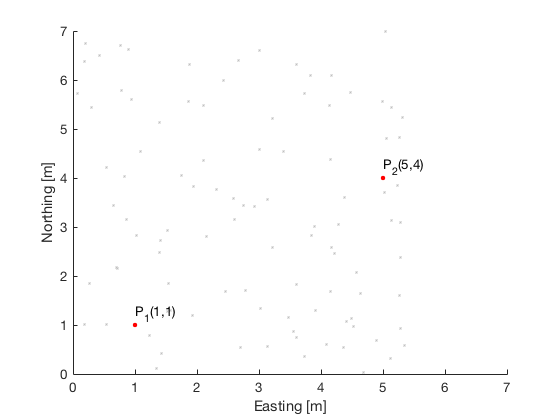

In [3]:
P1 = ['P_1(',num2str(x(1)),',',num2str(y(1)),')'];
P2 = ['P_2(',num2str(x(2)),',',num2str(y(2)),')'];
hold on
scatter(x,y,95,'.','r'),axis([0,7,0,7]),xlabel('Easting [m]'),ylabel('Northing [m]')
scatter(X,Y,01,[.75 .75 .75]),axis([0,7,0,7]),xlabel('Easting [m]'),ylabel('Northing [m]')
hold off
text(x(1),y(1),P1,'HorizontalAlignment','left','VerticalAlignment','bottom')
text(x(2),y(2),P2,'HorizontalAlignment','left','VerticalAlignment','bottom')

#### ...ciascuno di essi avrà un valore specifico di una proprietà del suolo: ad esempio prendiamo il Carbonio Organico (orizz. $\color{blue}{\mathbf{A_{(p)}}}$):

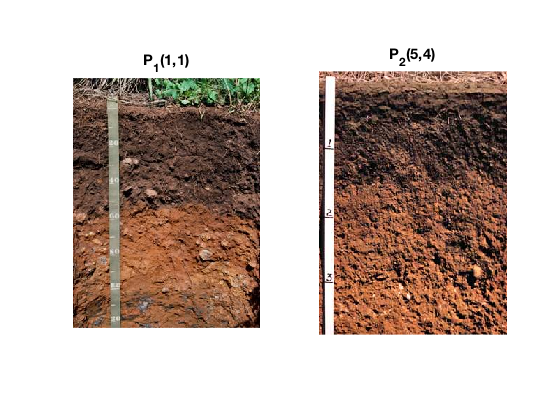

In [4]:
subplot(121)
imshow('artwork/P1.jpg'),title(P1)
subplot(122)
imshow('artwork/P2.jpg'),title(P2)

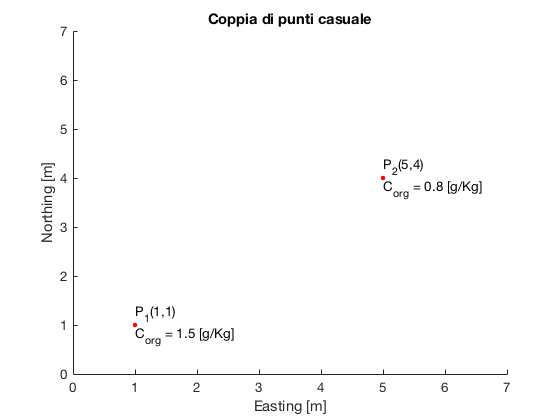

In [5]:
z1 = 1.5;% [g/Kg]
z2 = 0.8;% [g/Kg]
figure
scatter(x,y,95,'.','r'),axis([0,7,0,7]),xlabel('Easting [m]'),ylabel('Northing [m]'),title('Coppia di punti casuale')
text(x(1),y(1),P1,'HorizontalAlignment','left','VerticalAlignment','bottom')
text(x(2),y(2),P2,'HorizontalAlignment','left','VerticalAlignment','bottom')
text(x(1),y(1),'C_{org} = 1.5 [g/Kg]','HorizontalAlignment','left','VerticalAlignment','top')
text(x(2),y(2),'C_{org} = 0.8 [g/Kg]','HorizontalAlignment','left','VerticalAlignment','top')

### Obiettivo ––> calcolare la distanza tra i due punti $\color{red}{\mathbf{P_1}}$ e $\color{red}{\mathbf{P_2}}$
<ol>
  <li> Distanza geospaziale tra i due punti </li>
  <li> Distanza relativa alla variabile (proprietà del suolo | C.O.) misurata nei due punti </li>
</ol>

#### 1. Calcoliamo la distanza euclidea tra i due punti geospaziali $\color{red}{\mathbf{P_1}}$ e $\color{red}{\mathbf{P_2}}$

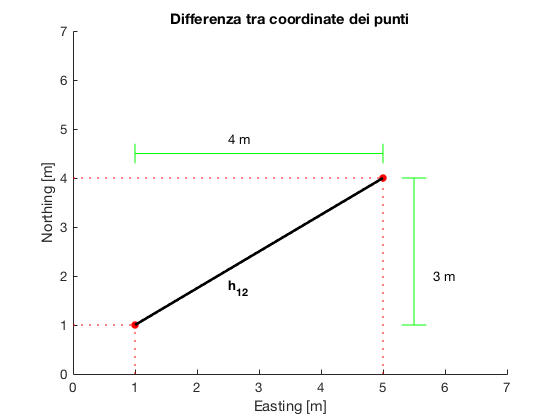

In [6]:
scatter(x,y,255,'.','r'),axis([0,7,0,7]),xlabel('Easting [m]'),ylabel('Northing [m]')
hold on
plot(x,y,'-k','LineWidth',2)
plot([x(1),x(1)],[0,y(1)],'r:'),plot([x(2),x(2)],[0,y(2)],'r:'),plot([0,x(1)],[y(1),y(1)],'r:'),plot([0,x(2)],[y(2),y(2)],'r:')
plot([x(1),x(2)],[y(2)+0.5,y(2)+0.5],'g'),plot([1,1],[y(2)+0.5-0.2,y(2)+0.5+0.2],'g'),plot([x(2),x(2)],[y(2)+0.5-0.2,y(2)+0.5+0.2],'g')
plot([x(2)+0.5,x(2)+0.5],[y(1),y(2)],'g'),plot([x(2)+0.5-0.2,x(2)+0.5+0.2],[y(1),y(1)],'g'),plot([x(2)+0.5-0.2,x(2)+0.5+0.2],[y(2),y(2)],'g')
hold off
text(x(2)/2,y(2)+0.8,[num2str(x(2)-x(1)),' m'])
text(x(2)+0.8,y(2)/2,[num2str(y(2)-y(1)),' m'])
text(x(2)/2,y(2)/2,['h_{12}'],'HorizontalAlignment','left','VerticalAlignment','top','FontWeight','b')
title('Differenza tra coordinate dei punti')

#### Applichiamo il teorema di Pitagora:
$h_{12} = \sqrt{(x_2-x_1)^2 + (y_2-y_1)^2} = \sqrt{4^2 + 3^2} = \sqrt{16 + 9} = \sqrt{25} = 5$ [m]

#### 2. Varianza: Distanza in C.O. [g/Kg] misurato nei due punti $\color{red}{\mathbf{P_1}}$ e $\color{red}{\mathbf{P_2}}$

$CO_{P_1} = 1.5\,[g/Kg]\;\;\;\;–>\;z(P_{1}) = z(x_{i})$ <br>
$CO_{P_2} = 0.8\,[g/Kg]\;\;\;\;–>\;z(P_{2}) = z(x_{i}+h)$ <br>

Utilizziamo $\mathbf{z}$ per indicare il contenuto in C.O. degli orizzonti $\color{blue}{\mathbf{A_p}}$,<br>
ma può essere utilizzata per indicare una qualsiasi proprietà del suolo (e non).

$\gamma (h) = (z(x_{i}+h)-z(x_{i}))^{2} = (0.8 - 1.5)^2 = -0.7^2 = 0.49$

In [7]:
gamma = (z2 - z1)^2;
fprintf('gamma = %.2f',gamma)

gamma = 0.49

### Estendiamo il calcolo a più punti contigui, fissando $\color{red}{\mathbf{P_1}}$

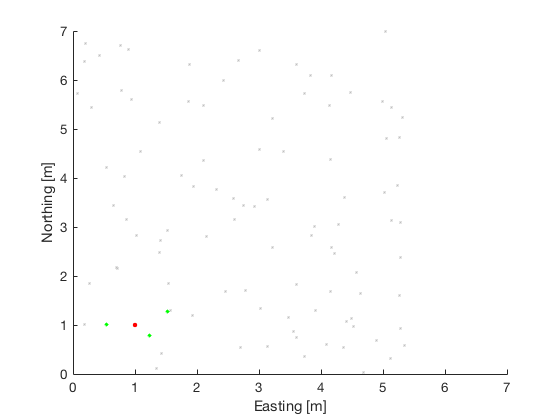

In [8]:
N = 3;
D = sqrt((X - x(1)).^2 + (Y - y(1)).^2);
[~,iD] = sort(D);
x1_n = X(iD(1:N));
y1_n = Y(iD(1:N));
d1_n = round(D(iD(1:N)),3);
z1_n = [z1-0.1:-0.1:z1-0.1*N]';%contenuto in C.O. [g/Kg] nei punti contigui
hold on
scatter(x(1),y(1),95,'.','r'),axis([0,7,0,7]),xlabel('Easting [m]'),ylabel('Northing [m]')
scatter(X,Y,01,[.75 .75 .75]),axis([0,7,0,7]),xlabel('Easting [m]'),ylabel('Northing [m]')
scatter(x1_n,y1_n,11,'green','filled'),axis([0,7,0,7]),xlabel('Easting [m]'),ylabel('Northing [m]')
hold off

#### Zoom in $\color{red}{\mathbf{P_1}}$

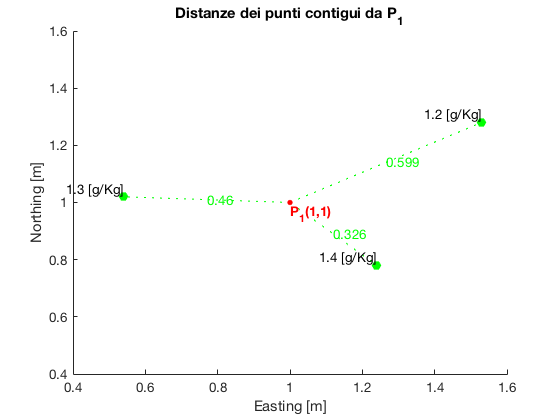

In [9]:
figure
hold on
scatter(x1_n,y1_n,51,'green','filled'),axis([0,7,0,7]),xlabel('Easting [m]'),ylabel('Northing [m]')
for ii = 1:N
  plot([x(1),x1_n(ii)],[y(1),y1_n(ii)],'g:')
  text(abs(x(1)+x1_n(ii))/2,abs(y(1)+y1_n(ii))/2,num2str(d1_n(ii)),'color','g')
  text(x1_n(ii),y1_n(ii),[num2str(z1_n(ii)),' [g/Kg]'],'HorizontalAlignment','right','VerticalAlignment','bottom')
end
scatter(x(1),y(1),125,'.','r'),axis([0,7,0,7]),xlabel('Easting [m]'),ylabel('Northing [m]')
text(x(1),y(1),P1,'HorizontalAlignment','left','VerticalAlignment','top','FontWeight','b','color','red')
hold off
axis([0.4,1.6 0.4,1.6])
title('Distanze dei punti contigui da P_1')

#### Calcoliamo le distanze geospaziali vs varianze per le 5 coppie di punti rappresentate nel grafico sopra: 
$(z(x_{i}+h)-z(x_{i}))^{2}$

In [10]:
gamma = (z1_n - z1).^2;
[d1_n,gamma]

ans =
                     0.326                      0.01
                      0.46        0.0400000000000001
                     0.599                      0.09


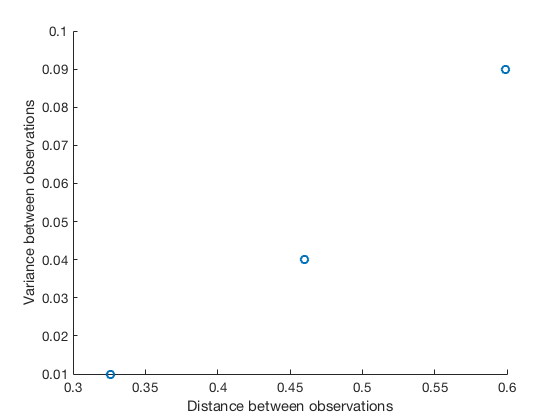

In [11]:
scatter(d1_n,gamma)
xlabel('Distance between observations')
ylabel('Variance between observations')

### Estendiamo il calcolo a tutti i punti di campionamento
(cioè collegando ciascun punto con tutti gli altri...)

In [12]:
% DISTANCES
[X1,X2] = meshgrid(X);
[Y1,Y2] = meshgrid(Y);
D = sqrt((X1 - X2).^2 + (Y1 - Y2).^2);

% SEMIVARIANCE
[Z1,Z2] = meshgrid(Z);
Gamma = (Z1 - Z2).^2;

% LOWER-LEFT TRIANGLE
indx = 1 : length(Z);
[C,R] = meshgrid(indx);
I = R > C;
% we only take I, because values are duplicated over the two triangles:
%  r=23;c=2;
%  [D(r,c),D(c,r)]

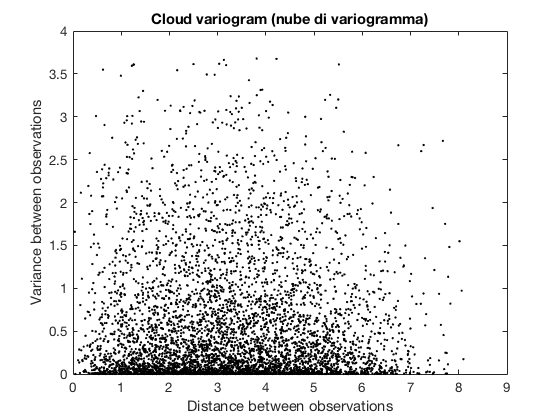

In [13]:
plot(D(I),Gamma(I),'Marker','.','LineStyle','none',...
     'MarkerFaceColor',[.6 .6 .6],'MarkerEdgeColor','k','MarkerSize',1)
xlabel('Distance between observations')
ylabel('Variance between observations')
title('Cloud variogram (nube di variogramma)')

### Costruzione del V A R I O G R A M M A sperimentale

${\displaystyle \gamma (h)=\sum _{i=1}^{n(h)}{\frac {(z(x_{i}+h)-z(x_{i}))^{2}}{n(h)}}}$

In [14]:
D2 = D.*(diag(X*NaN)+1);
lag = mean(min(D2));% rule of thumb

hmd = max(D(:))/2;
max_lags = floor(hmd/lag);

LAGS = ceil(D/lag);
for i = 1 : max_lags
    SEL = (LAGS == i);
    DE(i) = mean(mean(D(SEL)));
    PN(i) = sum(sum(SEL == 1))/2;
    GE(i) = mean(mean(Gamma(SEL)));
end

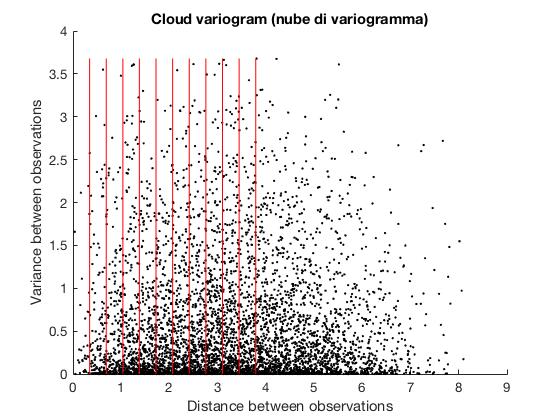

In [15]:
hold on
plot(D(I),Gamma(I),'Marker','.','LineStyle','none',...
     'MarkerFaceColor',[.6 .6 .6],'MarkerEdgeColor','k','MarkerSize',1)
xlabel('Distance between observations')
ylabel('Variance between observations')
title('Cloud variogram (nube di variogramma)')
for ii = 1:max_lags
  clag = lag*ii;
  plot([clag,clag],[0,max(Gamma(:))],'-r')
end
hold off

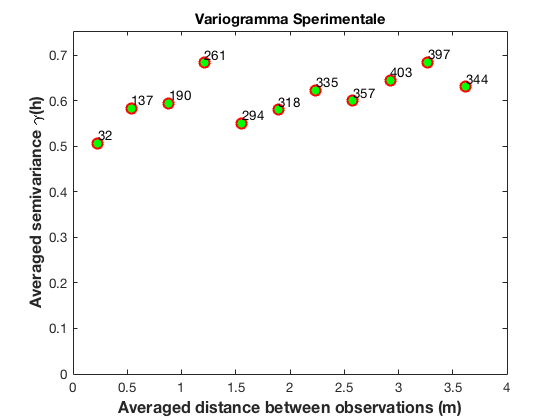

In [16]:
plot(DE,GE,'Marker','o','LineStyle','none',...
     'MarkerFaceColor','green','MarkerEdgeColor','r','MarkerSize',8) 
var_z = var(Z);
b = [0 max(DE)]; 
c = [var_z var_z];
hold on
%plot(b,c,'-k') 
yl = 1.1 * max(GE); 
ylim([0 yl])
xlabel('Averaged distance between observations (m)','FontWeight','b','FontSize',12)
ylabel('Averaged semivariance \gamma(h)','FontWeight','b','FontSize',12)
hold off
for ii=1:numel(PN)
  text(DE(ii),GE(ii),num2str(PN(ii)),'Verticalalignment','bottom','HorizontalAlignment','left')
end
title('Variogramma Sperimentale')

${\displaystyle \gamma (h)=\sum _{i=1}^{n(h)}{\frac {(z(x_{i}+h)-z(x_{i}))^{2}}{n(h)}}}$